Згенерований масив збережено у файл.
Зчитаний масив: [-201  174  -17  -15   -4 -142 -249 -183 -249  -54 -183    0 -213 -130
  -28   54  -65  104  175  -36 -249  -85 -205  -12   18  237 -212  -91
 -249  -79  -19 -171]


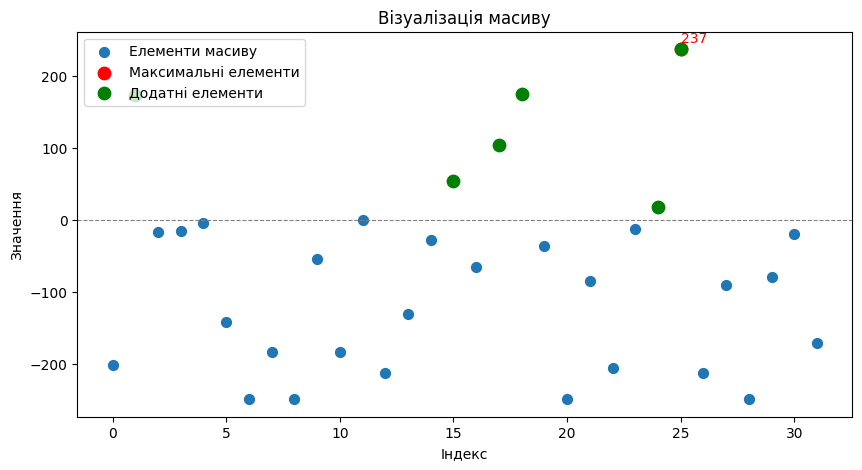

Кількість елементів між другим і третім максимальними: None
Сума цих елементів: None
Сума елементів до останнього додатного: -1795


Введіть інтервал [a, b]:  2 4


Стиснутий масив: [-201.  174.  -17.  -15.   -4. -142. -249. -183. -249.  -54. -183. -213.
 -130.  -28.   54.  -65.  104.  175.  -36. -249.  -85. -205.  -12.   18.
  237. -212.  -91. -249.  -79.  -19. -171.    0.]


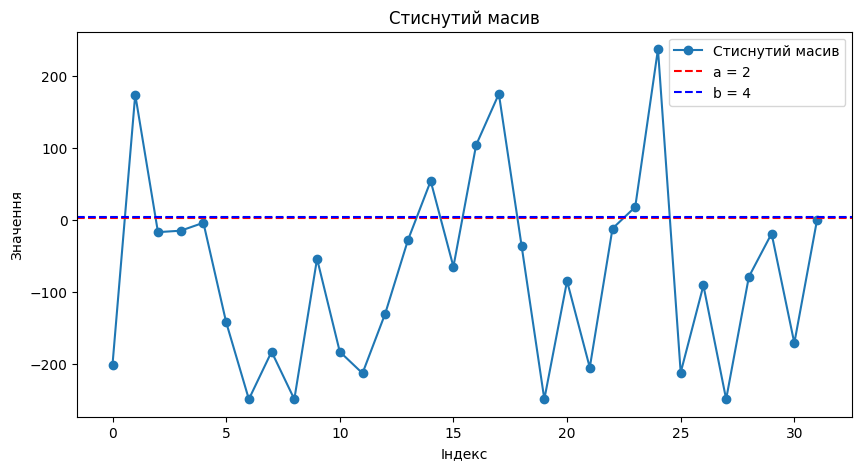

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import json

# 1. Генерація масиву
def generate_array():
    # Генеруємо масив із 32 цілих чисел від -255 до 255
    array = np.random.randint(-255, 256, 32)
    
    # Вибираємо максимальне значення
    max_val = np.max(array)
    
    # Замінюємо 3-4 елементи на максимальне значення
    max_count = random.choice([3, 4])
    max_indices = np.random.choice(range(32), max_count, replace=False)
    for idx in max_indices:
        array[idx] = max_val
    
    # Вставляємо 60% від'ємних чисел
    neg_count = int(0.6 * 32)
    neg_indices = np.random.choice(range(32), neg_count, replace=False)
    for idx in neg_indices:
        array[idx] = -abs(array[idx])
    
    # Забезпечуємо, щоб останні 6 елементів були від'ємними
    array[-6:] = -abs(array[-6:])
    
    return array

# 2. Збереження масиву в файл
def save_array_to_file(array, filename="array.json"):
    with open(filename, "w") as f:
        json.dump(array.tolist(), f)

# 3. Зчитування масиву з файлу
def read_array_from_file(filename="array.json"):
    with open(filename, "r") as f:
        return np.array(json.load(f))

# 4. Візуалізація масиву
def plot_array(array):
    max_val = np.max(array)
    max_indices = np.where(array == max_val)[0]
    positive_indices = np.where(array > 0)[0]
    
    plt.figure(figsize=(10, 5))
    plt.scatter(range(len(array)), array, label="Елементи масиву", s=50)
    plt.scatter(max_indices, array[max_indices], color="red", label="Максимальні елементи", s=80)
    plt.scatter(positive_indices, array[positive_indices], color="green", label="Додатні елементи", s=80)
    
    # Додаємо підписи для максимальних значень
    for idx in max_indices:
        plt.text(idx, array[idx] + 10, str(array[idx]), color="red", fontsize=10)
    
    plt.axhline(0, color="gray", linestyle="--", linewidth=0.8)
    plt.legend()
    plt.title("Візуалізація масиву")
    plt.xlabel("Індекс")
    plt.ylabel("Значення")
    plt.show()

# 5. Підрахунок між другим і третім максимальними
def count_between_maximums(array):
    max_indices = np.where(array == np.max(array))[0]
    if len(max_indices) < 3:
        return None, None  # Якщо менше трьох максимальних значень
    
    start_idx, end_idx = max_indices[1], max_indices[2]
    elements_between = array[start_idx + 1:end_idx]
    return len(elements_between), elements_between.sum()

# 6. Сума до останнього додатного елемента
def sum_before_last_positive(array):
    last_positive_idx = max(np.where(array > 0)[0], default=-1)
    if last_positive_idx == -1:
        return 0
    return array[:last_positive_idx].sum()

# 7. Стиснення масиву
def compress_array(array, a, b):
    new_array = np.array([x if not (a <= x <= b) else 0 for x in array])
    compressed_array = np.concatenate([new_array[new_array != 0], np.zeros(len(array) - np.count_nonzero(new_array))])
    return compressed_array

def plot_compressed_array(array, a, b):
    plt.figure(figsize=(10, 5))
    plt.plot(range(len(array)), array, marker="o", label="Стиснутий масив")
    plt.axhline(a, color="red", linestyle="--", label=f"a = {a}")
    plt.axhline(b, color="blue", linestyle="--", label=f"b = {b}")
    plt.legend()
    plt.title("Стиснутий масив")
    plt.xlabel("Індекс")
    plt.ylabel("Значення")
    plt.show()

# Демонстрація роботи
if __name__ == "__main__":
    array = generate_array()
    save_array_to_file(array)
    print("Згенерований масив збережено у файл.")
    
    loaded_array = read_array_from_file()
    print("Зчитаний масив:", loaded_array)
    
    plot_array(loaded_array)
    
    # Підрахунки
    count, sum_between = count_between_maximums(loaded_array)
    print(f"Кількість елементів між другим і третім максимальними: {count}")
    print(f"Сума цих елементів: {sum_between}")
    
    sum_before_positive = sum_before_last_positive(loaded_array)
    print(f"Сума елементів до останнього додатного: {sum_before_positive}")
    
    # Стиснення
    a, b = map(int, input("Введіть інтервал [a, b]: ").split())
    compressed_array = compress_array(loaded_array, a, b)
    print("Стиснутий масив:", compressed_array)
    
    plot_compressed_array(compressed_array, a, b)
